In [48]:
import os

fcndir = os.path.join('models', 'FCN-detector')
cnndir = os.path.join('models', 'CNN-detector')
lstmdir = os.path.join('models', 'LSTM-detector')
imagedir = os.path.join('data_road', 'training', 'image_2')
labeldir = os.path.join('data_road', 'training', 'gt_image_2')

In [49]:
import tensorflow as tf

fcnmodel = tf.keras.models.load_model(fcndir)
cnnmodel = tf.keras.models.load_model(cnndir)
lstmmodel = tf.keras.models.load_model(lstmdir)

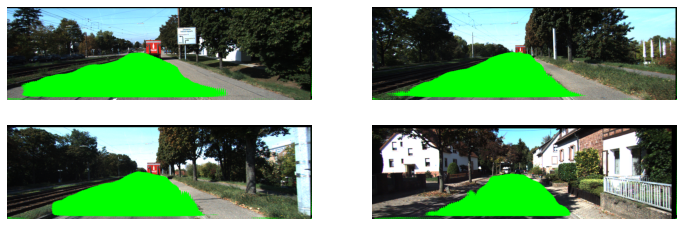

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_data(filenames):
    images = []
    for file in filenames:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.copyMakeBorder(img, (384-img.shape[0]), 0, 0, (1248-img.shape[1]), cv2.BORDER_CONSTANT, (0,0,0)) / 255
        images.append(img)

    return np.array(images)


files = os.listdir(imagedir)
files = [os.path.join(imagedir, x) for x in files]

# load a selection of 4 images
data = load_data(files[5:9])
_data = tf.data.Dataset.from_tensor_slices(data)
_data = _data.batch(1)
prediction = fcnmodel.predict(_data)

fig, axs = plt.subplots(2,2, figsize=(12,4))
def overlay(image, label):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if label[i,j,1] > 0.5:
                image[i,j] = np.array([0,1,0])
    return image

for i, p in enumerate(prediction):
    _image = overlay(data[i], p)
    axs[int(i / 2), int(i % 2)].imshow(_image)
    axs[int(i / 2), int(i % 2)].axis('off')

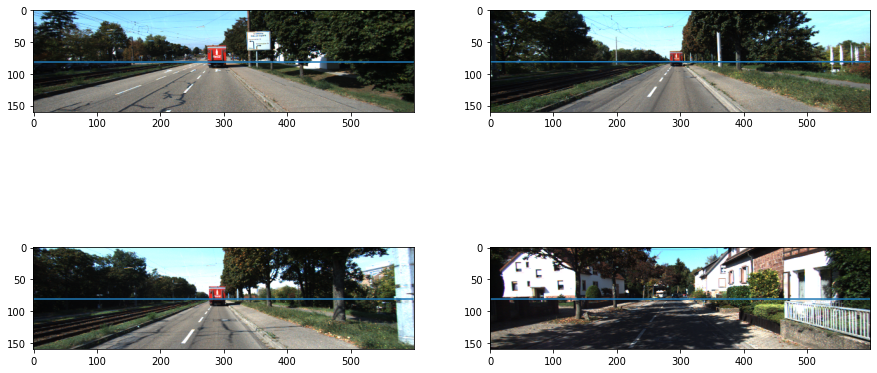

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_data(filenames):
    images = []
    for file in filenames:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (600, 160)) / 255.0
        images.append(img)

    return np.array(images)

def expand_label(label):
    label = (label * 80) + 1
    return label


data = load_data(files[5:9])
_data = tf.data.Dataset.from_tensor_slices(data)
_data = _data.batch(1)
prediction = cnnmodel.predict(_data)

fig, axs = plt.subplots(2,2, figsize=(15,8))
for i, p in enumerate(prediction):
    label = expand_label(p)
    axs[int(i / 2), int(i % 2)].imshow(data[i])
    axs[int(i / 2), int(i % 2)].plot(label)

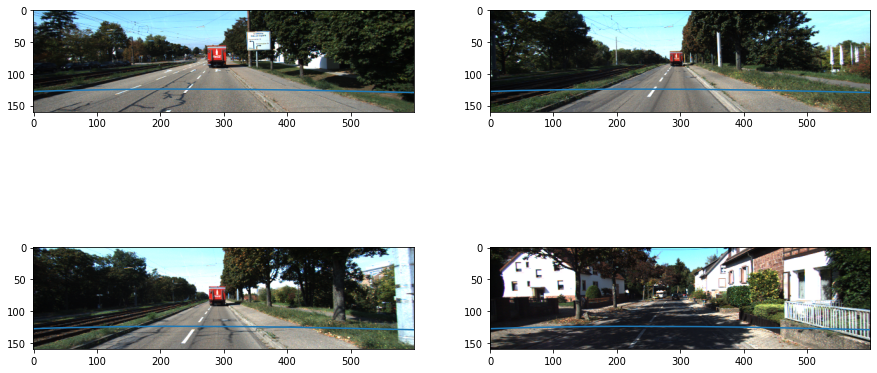

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_data(filenames):
    images = []
    for file in filenames:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (600, 160)) / 255
        images.append(img)

    return np.array(images)

data = load_data(files[5:9])
_data = tf.data.Dataset.from_tensor_slices(data)
_data = _data.batch(1)
prediction = lstmmodel.predict(_data)

fig, axs = plt.subplots(2,2, figsize=(15,8))
for i, p in enumerate(prediction):
    axs[int(i / 2), int(i % 2)].imshow(data[i])
    axs[int(i / 2), int(i % 2)].plot(p)